In [15]:
#by Henry Schumacher
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
import os
import sys
import json
import uuid
import time
import xraydb
import plotly
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
import numpy as np
import pandas as pd
# import pyxray as xy
import seaborn as sb
import mendeleev as md
import matplotlib as mpl
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from getmac import get_mac_address as gma
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],
    "text.usetex": True,
    "font.size": 8,
    "pgf.rcfonts": False
})
# rc('font',**{'family':'serif','serif':['Times']})
# rc('text', usetex=True)
# plt.rcParams.update({'font.size': 8})

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": "\n".join([
          r"\usepackage{mathtools}",
     ]),
})
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
def dual_print(output, txt):
    print(txt)
    with open(output, 'a') as out:
        print(txt, file=out)
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
from colors import load_colors
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#


mac = gma()
print(f"MAC address: {mac}")

mac_dict = {'f4:b5:20:5e:ba:f2': ['C://Users//schum//Documents//Filing Cabinet//1_RootFilesGeant4', 'C://Users//schum//Documents//Filing Cabinet//2_jsonFiles'], # Office
            '14:5a:fc:4f:e8:35': ['D://root_files_temp_storage', 'D://json_files_temp_storage'], # Laptop
            '0x1a7dda7115'  : ['B://IBA//root', 'B://IBA//json']} # Home PC
# Each mac adresse leads to a pair of paths, the first being the folder, 
# where the root files are, the second, where the json files are supposed to be stored
# root_path = mac_dict[mac][0]
json_path = mac_dict[mac][1]

color_schemes = load_colors()
print(color_schemes)

time.strftime("Kernel started: %a, %d %b %Y %H:%M:%S", time.localtime())

MAC address: f4:b5:20:5e:ba:f2
{'c_rainbow': ['#690000', '#C1292E', '#e08e45', '#E0BE36', '#7A8C2A', '#0D863D', '#2d82b7', '#740091'], 'c_complementary': ['#D90368', '#4C5395', '#2CDA9D', '#FA824C', '#3C91E6', '#FFBA08', '#009528', '#6689C6'], 'c_violetorange': ['#5E0ABF', '#701AA4', '#82298A', '#94396F', '#A64854', '#B85839', '#CA671F', '#DC7704'], 'c_five': ['#FFBA08', '#E05A5F', '#3D405B', '#81B29A', '#C45AB3']}


'Kernel started: Wed, 10 Sep 2025 11:48:47'

### TOPIC: RBS Background estimation
#### *Nuclear Instruments and Methods in Physics Research B4 (1984) 79-87*
----
This background estimate stems from the 1984 Bonn RBS Paper (informally BonnRBS1).
    

In [3]:
def bkgr_proton(E, d, Z, theta, eps):
    '''
    E: \n
    d: \n
    Z: \n
    theta: \n
    eps:  
    '''
    eps_fac = (0.84*10**7 + 2.56*10**7 * eps)
    sin_exp = -15.7
    E_exp = -5.762
    d_exp = 2.552
    Z_exp = 1.378
    theta_rad = theta/180 * np.pi
    B =  eps_fac * np.sin(theta_rad/2)**(sin_exp) * E**(E_exp) * d**(d_exp) * Z**(Z_exp)
    return B

In [ ]:
def bkgr_alpha(E, d, Z, theta, eps, eps0):
    B = 1
    return B

In [30]:
def unitConverter(nm,rho):
    mug = nm * rho * 0.1
    return mug

def unitConverter2(mug,rho):
    nm = 10 * mug / rho
    return nm

print(unitConverter2(mug=140, rho=md.element('Au').density))

print(unitConverter(nm=100, rho=md.element('Si').density))
print(unitConverter(nm=10**7, rho=md.element('Si').density))

Si100nm = unitConverter(nm=100, rho=md.element('Si').density)
Si1cm = unitConverter(nm=10**7, rho=md.element('Si').density)

72.53886010362694
23.296000000000003
2329600.0


In [20]:
E_lin = np.linspace(100,14000,5000)
d_lin = np.logspace(np.log10(Si100nm),np.log10(Si1cm), 5000)
Z_lin = np.linspace(3,118,116)
theta_lin = np.linspace(90,180,5000)


print(d_lin)

[2.32960000e+01 2.33497136e+01 2.34035510e+01 ... 2.31889432e+06
 2.32424100e+06 2.32960000e+06]


Text(0, 0.5, 'nm')

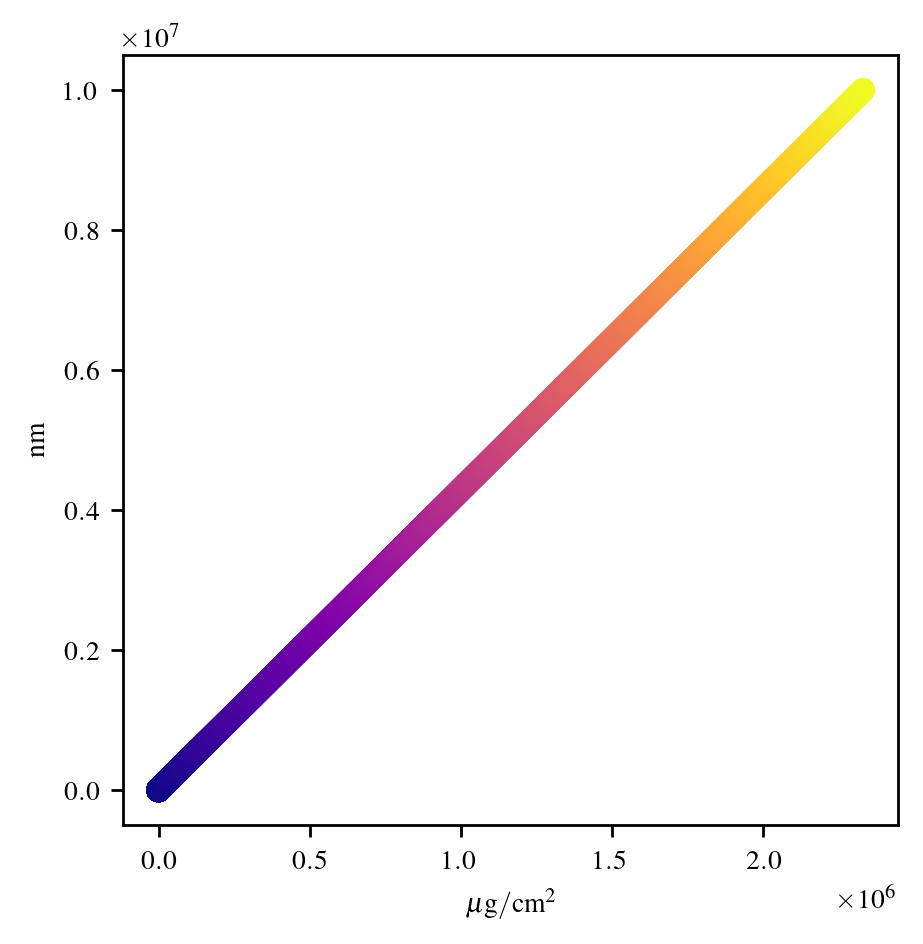

In [31]:
plt.figure(figsize=(4,4), dpi=250)
plt.scatter(d_lin, 10*d_lin/md.element('Si').density, c=d_lin, cmap=mpl.colormaps['plasma'])
plt.xlabel(r'$\mu\mathrm{g} / \mathrm{cm}^2$')
plt.ylabel('nm')

